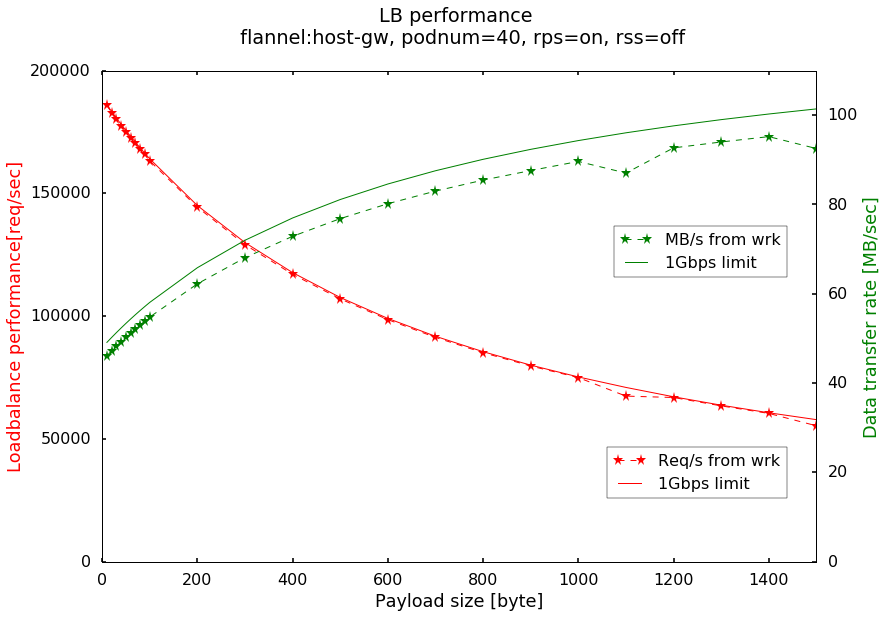

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

plt.style.use('seaborn-poster')
fig = plt.figure()
ax1 = fig.add_subplot(111)

dt0 = np.loadtxt("rss_rps_rfs_0_1_0/ipvs_cpu16_pod40.csv",usecols=(0, 1, 2), delimiter=',', unpack=True, skiprows=1)

ax1.plot(dt0[0],dt0[1], color='r', label='Req/s from wrk', ls='--',lw='1',marker='*')
ax1.plot(x, 1000000000/(x+662)/8, label='1Gbps limit', color='r',ls='-',lw='1')
ax1.set_ylabel('Loadbalance performance[req/sec]', color='r')
plt.legend(loc=1, bbox_to_anchor=(0.97, 0.25))

ax2 = ax1.twinx()
ax2.plot(dt0[0],dt0[2], color='g', label='MB/s from wrk', ls='--',lw='1',marker='*')
ax2.plot(x, 1000/(x+662)/8*(254+x), label='1Gbps limit', color='g',ls='-',lw='1')
ax2.set_ylabel('Data transfer rate [MB/sec]', color='g')
plt.legend(loc=1,bbox_to_anchor=(0.97, 0.7))

ax1.set_xlabel('Payload size [byte]')
ax1.set_xlim(0,1500)
ax2.set_ylim(0,110)
plt.title('LB performance \n flannel:host-gw, podnum=40, rps=on, rss=off\n')
plt.savefig('performance_limitation.png')
#plt.show()